In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from __future__ import division

import os

import numpy as np
import math

from glob import glob

import reduce_dblspec 
import pipeline

from astropy import constants as const


from astropy.io import fits
from astropy import units as u
from astropy import modeling
from astropy.modeling import models, fitting
from astropy.table import Table
from photutils import centroid_com


from astropy import modeling
from astropy import constants as cnst
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

# Dispersion Solutions - only need 1.0" for targets
## RED 1.0"

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


used atlas plot limits for Red side


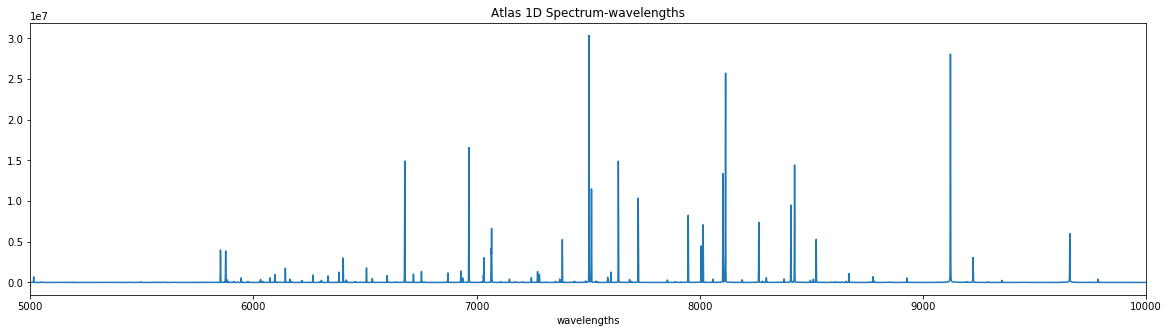

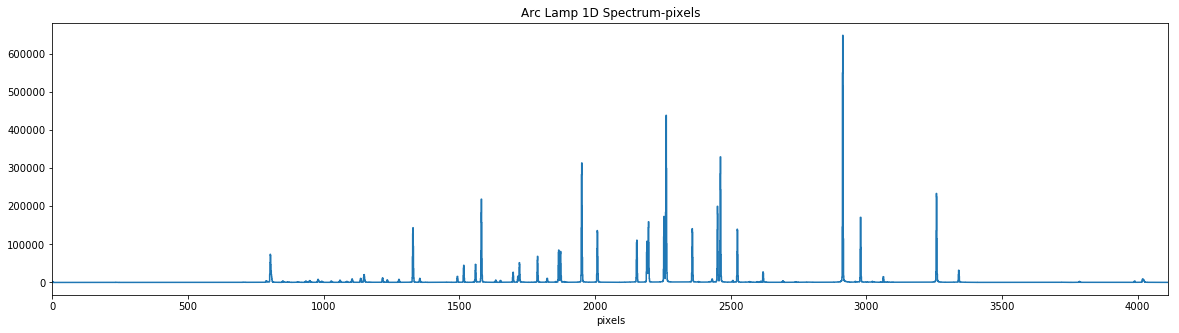

In [2]:
#fix by redefining flats object id for 1.0" & 1.5" slits for red and blue sides
#*******this may be same problem for one of other objects observed (m?) in original nb


#nameing all the datafiles needed
all_side_files_red10 = 'DoubleSpec/20151109/red*.fits' #redside
atlasfiles_red10 = fits.open('henear.fits') #NOAO atlas #redside
arcfiles_red10 = 'DoubleSpec/20151109/red0012.fits' #redside
linelist_red10 = reduce_dblspec.HENEAR_LINE_LIST
flatid = 'DomeFlats 1p0' #this is for 1.0" slit only

specset_red10 = pipeline.dispersion(all_side_files_red10, atlasfiles_red10, arcfiles_red10, linelist_red10,flatid)

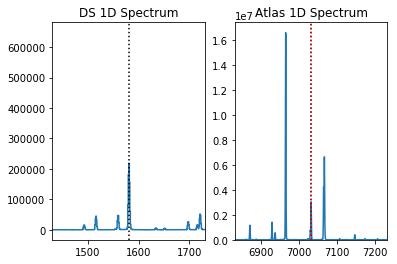

In [3]:
#collecting guesses of matching lines from above graphs

#entering(px,wl)guesses & data
pipeline.guess_plot(1580,7032.4131,specset_red10) #outputs (pixel guess, nearest wl/id in linelist)

#collect guesses here ~5 seems good
pixel_guesses_red10 = [2911,2260,1949,3256]#,1580]
atlas_lines_red10 = [9122.9674,8115.311,7635.106,9657.7863]#,7032.4131,]
guesses_red10 = list(zip(pixel_guesses_red10, atlas_lines_red10)) #making tuples to pass into fcn later

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


chose ds for redside
chose guesses for redside
Skipping line HeI at wl=3187.745 - out of wl min/max
Skipping line ArII at wl=3307.2283 - out of wl min/max
Skipping line ArI at wl=3319.3446 - out of wl min/max
Skipping line ArII at wl=3350.9243 - out of wl min/max
Skipping line HeI at wl=3354.55 - out of wl min/max
Skipping line ArI at wl=3373.4823 - out of wl min/max
Skipping line ArII at wl=3376.4359 - out of wl min/max
Skipping line ArII at wl=3388.5309 - out of wl min/max
Skipping line NeII at wl=3397.866 - out of wl min/max
Skipping line ArI at wl=3406.1804 - out of wl min/max
Skipping line ArII at wl=3414.4583 - out of wl min/max
Skipping line NeI at wl=3417.9035 - out of wl min/max
Skipping line ArII at wl=3421.6107 - out of wl min/max
Skipping line ArII at wl=3454.0952 - out of wl min/max
Skipping line ArII at wl=3464.1272 - out of wl min/max
Skipping line NeI at wl=3472.5711 - out of wl min/max
Skipping line ArII at wl=3476.7474 - out of wl min/max
Skipping line ArII at wl=3480

Failed to find line KrI at wl=7694.5393: "Guessed line's peak to base ratio is 1.0383224228530856, which is less than 10"
Failed to find line KrI at wl=7854.8215: "Tried to find peak at 2093.095866834045 but it's in a valley, not a peak"
Failed to find line ArI at wl=7891.075: "Guessed line's peak to base ratio is 1.1660412658752195, which is less than 10"
Failed to find line KrI at wl=7913.4242: "Guessed line's peak to base ratio is 1.0588383169514102, which is less than 10"
Failed to find line ArI at wl=7948.1764: "Guessed line's peak to base ratio is 8.625630582376273, which is less than 10"
Failed to find line ArI at wl=8006.1567: "Guessed line's peak to base ratio is 7.795072684931403, which is less than 10"
Failed to find line ArI at wl=8014.7857: "Guessed line's peak to base ratio is 9.486555120237183, which is less than 10"
Failed to find line KrI at wl=8059.5038: "Guessed line's peak to base ratio is 0.9489822995221208, which is less than 10"
Found line ArI at wl=8103.6931
Cli

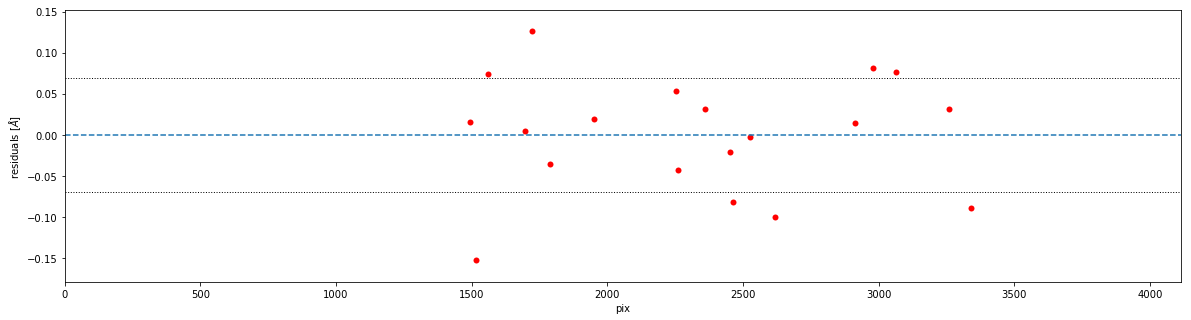

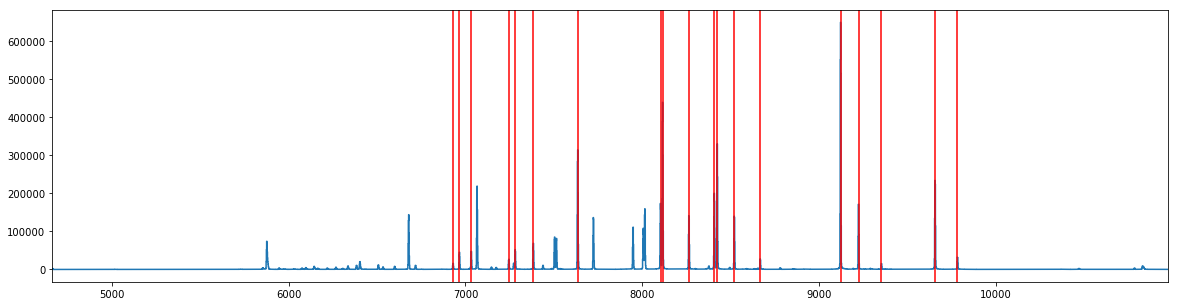

In [4]:
ds_red10 = pipeline.goodness_of_matches(arcfiles_red10,guesses_red10,all_side_files_red10,atlasfiles_red10,linelist_red10,flatid)

## Beowulf 1

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


3 target files located


choose 2D spec for redside
choose 1D target spec axis limits for redside


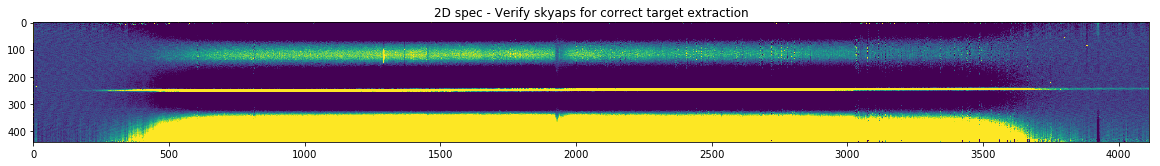

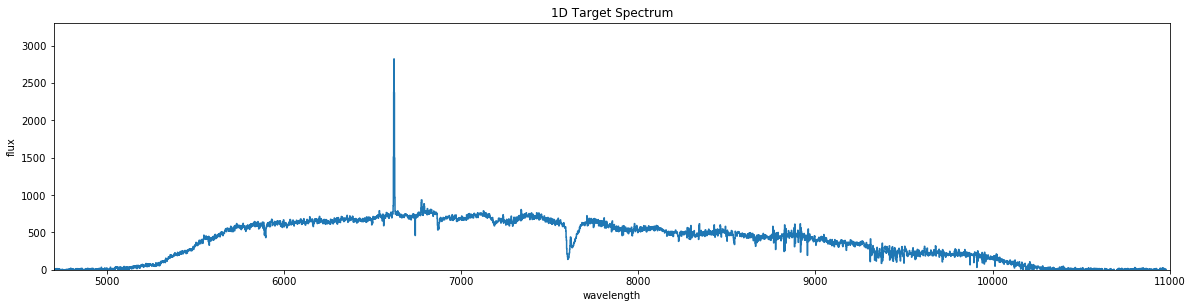

In [5]:
#RED SIDE 1.0 only
#naming files needed
targetID_red10_b1 = 'Beowulf_1'
skyaps_red10_b1 = [(60,110),(180,350)] #210-350
all_side_files_target = 'DoubleSpec/20151109/red*.fits'
flatid = 'DomeFlats 1p0'
specaps=(105,130)#((120,135))#90-105
vmax = 40
vmin = -10
model_b1 = ('poly',3)#'linear'

flux_red10_B1,unc,comb = pipeline.sky_subtract(targetID_red10_b1,skyaps_red10_b1,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model_b1)

# Starting 2nd reduction technique for rot.curves
## isolating h-alpha region (removed 2D from pipeline to play with)

In [6]:
#need this for 2d only extraction (pipeline modification)
def sky_subtract(comb,skyaps,model):    
    #plotting 2D to get skyaps right around the target
    plt.figure(figsize=(10,25)) #setting up fig size
    value = model[1]
    if model == 'linear':
        subimg, models = comb.subtract_sky(skyaps, skymodel=modeling.models.Linear1D(1,0)) #(1,0)
    elif model == ('poly',value):
        subimg, models = comb.subtract_sky(skyaps, skymodel=modeling.models.Polynomial1D(value)) #Linear1D(1/10,10)) #(1,0)
    elif model == ('combined',value):
        mymodel=(modeling.models.Polynomial1D(value) + modeling.models.Linear1D(1,0))
        subimg, models = comb.subtract_sky(skyaps, skymodel=mymodel)
    elif model == None:
        subimg, models = comb.subtract_sky(skyaps, skymodel=None)#subtracts mean
    else:
        print ("Model type or polynomial degree not recognized")
    return (subimg, comb, models)    #subtracted2D, original, fitted models per row

(1287, 1297)

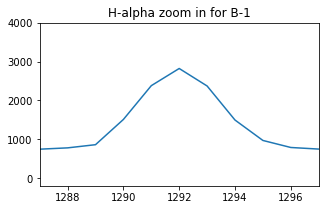

In [7]:
#quick spectral pix range estimate from 1D spectrum
plt.figure(figsize=(5,3))
plt.plot(flux_red10_B1)
plt.title('H-alpha zoom in for B-1')
plt.ylim(-200,4000)
plt.xlim(1287,1297) #1288-1296


In [8]:
#setup to extract 2D only (uses pipeline modification)


#stacking all those instrument-noise-subtracted target data files-help increase s/n 
atlasfiles = fits.open('henear.fits') #use for creating dispersion solution later 

#determing what instumentation noise is
flats = [reduce_dblspec.DoubleSpecImage(fn).overscan_sub_and_trim() for fn in 
          reduce_dblspec.find_all_obj(flatid,'DoubleSpec/20151109/red*.fits')[:10]] #DO I WANNA KEEP AS ONLY LAST 10???
nfl = reduce_dblspec.create_normalized_flat(flats)   
header = atlasfiles[0].header    
    
#locating all files w/ the target & instrumentation noise subtraction
specs = [reduce_dblspec.DoubleSpecImage(fn).overscan_sub_and_trim().flatten(nfl) 
          for fn in reduce_dblspec.find_all_obj(targetID_red10_b1,all_side_files_target)]
#specs is the inst. noise subtracted group of files with data from target    
    
print("This is lenspecs:",len(specs))
comb = reduce_dblspec.combine_imgs(specs) #comb-all files data from target stacked
skyaps_red10 = [(50,100),(195,350)]
model=('poly',3)

subimg2, comb2, fitmodels = sky_subtract(comb,skyaps_red10,model)
#subimg2 is sky-subtracted, instumentation noise subtracted, 

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


This is lenspecs: 3


SPECTRAL H-alpha wl range in pix: 1288:1297;
SPACE Target spatial range in pix space: 55:155


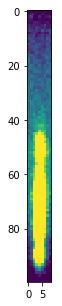

In [9]:
#2d ha region in pixels (from pipeline modification)

plt.figure(figsize=(5,5))
testingthis=subimg2.data[55:155,1288:1297] #[spatialrange,spectralrange]
ha_spacepix_range = [55,155]
ha_specpix_range = [1288,1297] 

vmin=-10
vmax=45
plt.imshow(testingthis,vmin=vmin,vmax=vmax)
print('SPECTRAL H-alpha wl range in pix: 1288:1297;') #w/o missing 3 wl's , to use with flux data - 3
print('SPACE Target spatial range in pix space: 55:155')

## getting galaxy core using full continuumm

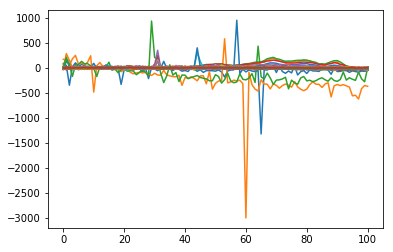

In [10]:
#getting gal core pix...PART ONE

target_aperature=(55,155) #target location

flux_data=[] #empty list to hold target 2d spec
apslc = np.arange(target_aperature[0],target_aperature[1]+1,1) #makes list for which rows to extracct spec from
#print (apslc) #as expected, +1 so doesnt cut off last value

#plt.plot(flux_red10_AK2[0:10])
#based on plot need to chop first 3 pixs due to osscialations 

#np.shape(subimg2.data)#(440, 4114)
for i in apslc:
    spec = subimg2.data[i]#subimg2 is sky-subtracted 2D spec #this is every row's spec...
    #plt.figure(figsize=(20,10))
    #plt.plot(spec)
    #need to change if suming multiple pixel rows
    #spec = spec[3::] #chops first 3 flux values in spectral (wl) direction-crazy osscillations
    flux_data.append(spec) #collects a list of every row's spec within the target location
flux_data=np.array(flux_data)
plt.plot(flux_data);
wl_pix_correction = 0


# ASk ABOUT ABOVE B/C OF ASYMMETRY IN HA (KNOTS)....HOW DETERMINE CORE ALONG SPACE DIRECTION

shape (101, 1)
x: 0.0 y: 9.09539533032 y is the spatial core location still in pixels & in the Reduced spectral range
to get full plate scale pix value add 55 and 3 from 1D spec cut due to oscillations
GALAXY CORE (based on entire red side plate scale) IS AT SPATIAL PIXEL: 64.0953953303
SPACE_PIX_CORRECTION DEFINED HERE!!!!!!!


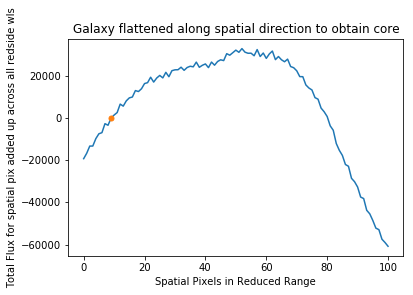

In [11]:
#getting gal spatial core pix...PART TWO

#flattening to be along spatial direction (histogram like)
flux_array = np.sum(flux_data,axis=1) #explicitly making an array
flux_array2d = flux_array[:, np.newaxis] #need 2d for centroiding


print('shape',np.shape(flux_array2d))
x_galcore, y_galcore = centroid_com(flux_array2d) #actually doing the centroiding

#plotting
plt.plot(flux_array2d);
plt.plot(y_galcore, x_galcore ,'.',markersize=10)
plt.xlabel('Spatial Pixels in Reduced Range')
plt.ylabel('Total Flux for spatial pix added up across all redside wls')
plt.title('Galaxy flattened along spatial direction to obtain core')
space_pix_correction = target_aperature[0] 
spatial_core_pix = y_galcore + space_pix_correction #(adds 55 to correct from target extraction),(DONT need 3 from oscillations doesnt affect this b/c of spectral collapse in sum)

#conclusions
print('x:',x_galcore,'y:',y_galcore, 'y is the spatial core location still in pixels & in the Reduced spectral range')
print('to get full plate scale pix value add {:} and 3 from 1D spec cut due to oscillations'.format(target_aperature[0]))
print('GALAXY CORE (based on entire red side plate scale) IS AT SPATIAL PIXEL:',spatial_core_pix)
print('SPACE_PIX_CORRECTION DEFINED HERE!!!!!!!')



## getting galaxy core using regions around Ha


shape of first section: (101, 50) matches shape of second section: (101, 50)
shape of first section 2d: (101, 1)
shape of second section 2d: (101, 1)
first section centroid x,y: 0.0 40.6416349548
second section centroid x,y: 0.0 40.1635609274
This is the average pixel value of the core BEFORE spatial cutout corrections 40.4025979411
Pixel Value of core along spatial axis wrt full CCD size 95.4025979411


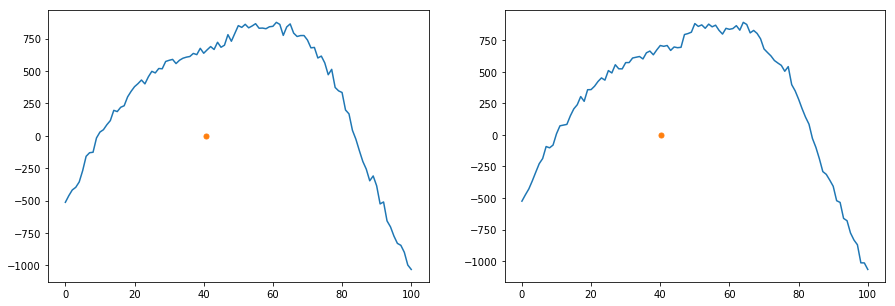

In [12]:
#USING SECTIONS SURROUNDING HALPHA WL RANGE
np.shape(flux_data)#(226,4104) #note that this is missing those 3 wl's
#also note flux_data is continuum subtracted



#making arrays surrounding h-alpha
upperha = 1297 #subtracted 3 already for osscillation in spectral direction (did another -1)
lowerha = 1288 #subtracted 3 already for osscillation in spectral direction (did another -1)
width_sections = 50
upper_one = lowerha - 1 #just to give it some distance
lower_one = upper_one - width_sections
lower_two = upperha + 1
upper_two = lower_two + width_sections
first_section = flux_data[:,lower_one:upper_one]
second_section = flux_data[:,lower_two:upper_two]
print('shape of first section:', np.shape(first_section), 'matches shape of second section:', np.shape(second_section))
#plt.plot(second_section[120]); #tried many diff row values for both sections here - satisified correct


#collapsing both sections in the spatial direction (histogram like)
first_section_sum = np.sum(first_section,axis=1) 
first_section2d = first_section_sum[:,np.newaxis] #2d required to centroid
second_section_sum = np.sum(second_section,axis=1)
second_section2d = second_section_sum[:,np.newaxis] #2d required to centroid
print('shape of first section 2d:', np.shape(first_section2d))
print('shape of second section 2d:', np.shape(second_section2d))


#does the centroiding
x_first, y_first = centroid_com(first_section2d)
x_second, y_second = centroid_com(second_section2d)
print('first section centroid x,y:',x_first,y_first)
print('second section centroid x,y:',x_second,y_second)



#verify by plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(first_section2d);
ax2.plot(second_section2d);
#note below had to reverse xy centroids to visualize correctly, not sure why it inverted tho...
ax1.plot(y_first,x_first, '.', markersize=10)
ax2.plot(y_second,x_second, '.', markersize=10)

#averaging the two core values, the y's
core_array = np.array([y_first,y_second])
core_avgcentroids = np.mean(core_array)
print('This is the average pixel value of the core BEFORE spatial cutout corrections',core_avgcentroids)

#corrections to pixel value of avg section core
core_from_sections = core_avgcentroids + space_pix_correction #corrects for spatial axis target cutout
print('Pixel Value of core along spatial axis wrt full CCD size',core_from_sections)




## Centroiding Halpha within target


should be blank []


[ 3.99225048  4.52757393  4.16405868  4.21883174  4.14827911  4.08852378
  4.71349126 -2.31273372  3.33551959  4.35776981  4.82351585  4.71362118
  2.96809643  2.95824053  5.30268214  5.48191259  4.1778808   4.31226045
  3.06731203  4.00306087  3.89216369  3.7746057   4.29374764  4.23036531
  3.17806455  4.19611621  4.03564098  3.75404068  4.01176909  4.17831251
  4.03913232  3.97237041  3.75562096  3.79224522  4.08966336  4.08560322
  4.26779548  3.86595973  3.87181482  4.03168672  4.0354695   3.92613241
  4.1911363   4.22464945  4.25423536  4.13038544  4.09302247  4.12612579
  4.15573846  4.22916493  4.23298648  4.38777698  4.26878111  4.18360662
  4.09053357  4.16775466  4.21794771  4.06271293  4.16581611  4.11505174
  4.06536716  4.12406465  4.13522941  4.15191586  4.18432593  4.05084521
  4.06928622  3.99749051  3.88591475  3.88276983  3.91939567  3.96660977
  3.94567847  4.07527057  3.94395365  4.01340239  3.88000514  3.85717543
  3.87444486  3.81175744  3.84736429  3.90746608  3

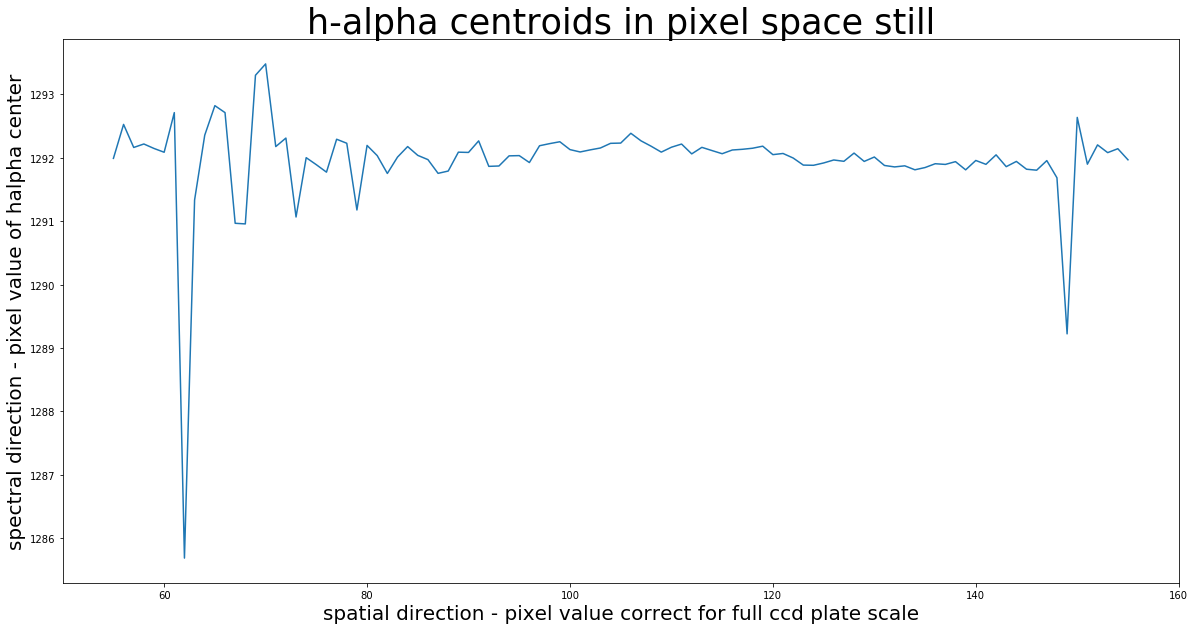

In [13]:


#below for reference, uses full ccd wl range - first defined when applied DS
wl = np.array(ds_red10.pixtowl(np.arange(len(subimg2.data[::][0]))))
wl_shorter2 = wl[1288:1297] #isolate wl around h-alpha using full ccd plate wl range formerly 1387:1400
new_short = flux_data[:,1288:1297]
wl_aperature = [1288,1297]

means_unc=[]
means=[]
print('should be blank',means)
stddev = []
gfit_vals = []
mylist2 = []
mylist_ys2 = []
holding2 = []
ha_wls2 = []
##below for reference- new is continuum subst target flux data (flux_data has 10 wl cut)
#concerned 10 wl cut means 10 flux cut too in the lenght of the data but cant decide
#if the 10 is already accounted for by +1387 or should also add into space_pix_correction2
#b/c that 10 cut cutout those wl's and corresponding fluxes
##new_short = new[:,1386:1399] #cut to isolate wl around h-alpha with 10 pix misisng b/c its continuum subt data not 2d full ccd

#gets halpha centroids in target gal's range
for row in new_short: 
    #calculates centroids per row
    flux_fake2d2 = row[np.newaxis, :] #makes each row array into a fake2d
    #print('row?',flux_fake2d)
    mylist4, mylist5 = centroid_com(flux_fake2d2)#finds center(x,y) of halpha for each row array
    #print(mylist4) #, mylist5)
    #holding_arr2 = row, wl_shorter2
    #xarr = np.array([row,wl_shorter2])
    mylist_ys2.append(mylist5)
    mylist2.append(mylist4) #collects all halpha centers/centroids per row
    
    #calculating errors per row via gaussian fit
    x = ar(range(len(row)))
    y = row
    mean = mylist4
    g_init = models.Gaussian1D(amplitude=max(y), mean=mean, stddev=2.)
    fit_g = fitting.LevMarLSQFitter()
    gaussian = fit_g(g_init, x, y)
    #print('mean', gaussian.mean)
    means.append(gaussian.mean.value)
    gfit_vals.append(gaussian)
    stddev.append(gaussian.stddev.value) #
    
    #trying to get uncertainities per row via covariance matrix
    gaussian.param_cov = fit_g.fit_info['param_cov']
    #means_unc.append(fit_g.fit_info['param_cov'][1][1]) #dont know why this doesnt work
    
 #end of for loop   
gfit_vals = np.array(gfit_vals)  
stddev = np.array(stddev)
means = np.array(means)
mylist2=np.array(mylist2) #halpha centroids (wl) array
print(mylist2)
print('mean',np.shape(means))#,means, 'fixed THE PROBLEM!!!!!!!!!!!!!!!!!!!!!!')
gaussmax_specpix_fullccd = means + stddev + wl_pix_correction + 55
centroid_specpix_fullccd = mylist2 + wl_pix_correction + 55




#taking sqrt of unc to get a true sigma
sigma_gauss = []
for i in means_unc:
    sigma = m.sqrt(abs(i))
    sigma_gauss.append(sigma)
sigma_gauss


#correction for target wl pix's to match index of full ccd plate pix's (still not correct len but dont care about below target pixs-no data there neway)
#1386 correction b/c thats the cut used for new_short when isolating ha due to 10 pix initial cut
wl_pix_corrected = mylist2 + wl_pix_correction + wl_aperature[0] #decide how to better automate/track this
print('wl_pix_corrected defined here')
#dont have to account for osciallations b/c used full ccd plate range b4 wl cut 4 h-alpha isolation
space_pix_correction2 = np.arange(len(mylist2)) + space_pix_correction #centroids

print('len',len(mylist2),type(mylist2), np.shape(mylist2))
print('len',len(space_pix_correction2),type(space_pix_correction2), np.shape(space_pix_correction2))
print(np.shape(stddev))
 
    
#plotting
plt.figure(figsize=(20,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - pixel value of halpha center',fontsize=20)
plt.plot(space_pix_correction2,wl_pix_corrected)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
plt.title('h-alpha centroids in pixel space still',fontsize=35)
#plt.ylim(1393,1405)

<class 'numpy.ndarray'>
LOOKS PROMISING


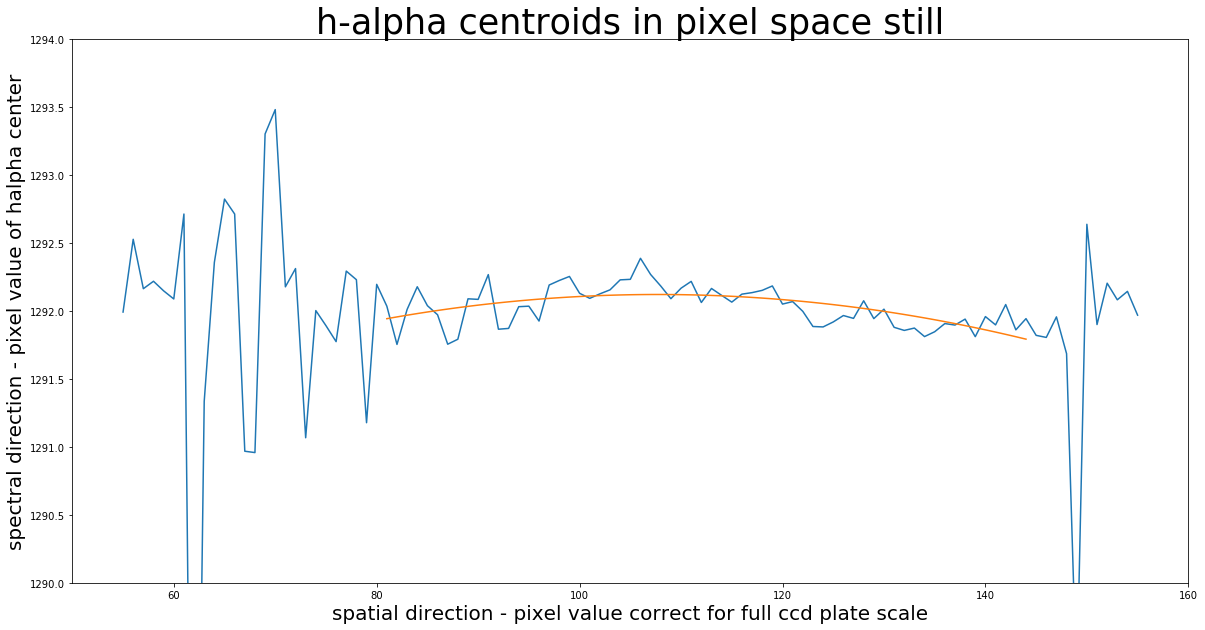

In [14]:
#plotting
plt.figure(figsize=(20,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - pixel value of halpha center',fontsize=20)
plt.plot(space_pix_correction2,wl_pix_corrected)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
plt.title('h-alpha centroids in pixel space still',fontsize=35)
plt.ylim(1290,1294)

print(type(space_pix_correction2))

#fit a line (avoiding osccillations at ends)
model = modeling.models.Polynomial1D(2)
x=np.arange(80,145,1)
fitmsk = (80<space_pix_correction2)&(space_pix_correction2 <145)
y=wl_pix_corrected
fit = modeling.fitting.LevMarLSQFitter()#space_pix_correction2)#,[linemodel,[y],[x]])
linemodel = fit(model,space_pix_correction2[fitmsk],wl_pix_corrected[fitmsk])
modwl = np.linspace(space_pix_correction2[fitmsk][0], space_pix_correction2[fitmsk][-1], 100)
plt.plot(modwl, linemodel(modwl))


print('LOOKS PROMISING')

## convert pixs to kpc


In [15]:
target_spacepix_fullccd = np.arange(len(mylist2)) + space_pix_correction
distance_pix_wrtcore_sections = target_spacepix_fullccd - core_from_sections #for core wl using 2 sections around Halpha

#actual converting for loop CENTROIDS pixels to kpc
#good for core defined by 2 sections around halpha

#converts pixels to kpc (distance profile)
arcmins_sections =[]
distances_sections=[]
more_sections = []


#converts pix to kpc and saves as quantity list
for i in distance_pix_wrtcore_sections:
    r_in_arcmin = 1*u.arcmin
    redplatescale = 0.293*u.arcsec/u.pixel
    dbsp_pix_equiv = u.pixel_scale(redplatescale)
    r_in_pixel = i*u.pixel
    r_in_arcmin = r_in_pixel.to('arcmin', dbsp_pix_equiv)
    #print(r_in_arcmin)
    distance = 37*u.Mpc # distance of object (host) from us
    rad_to_arcmin = (1*u.rad).to('arcmin')
    r_in_kpc = ((r_in_arcmin/rad_to_arcmin)*distance).to("kpc") #gets radians*distancefromus for gal width in kpc
    #print(r_in_kpc)
    more_sections = r_in_kpc #/ (1*u.kpc)
    #print(more_sections)
    distances_sections.append(more_sections.value)
distances_sections = np.array(distances_sections)

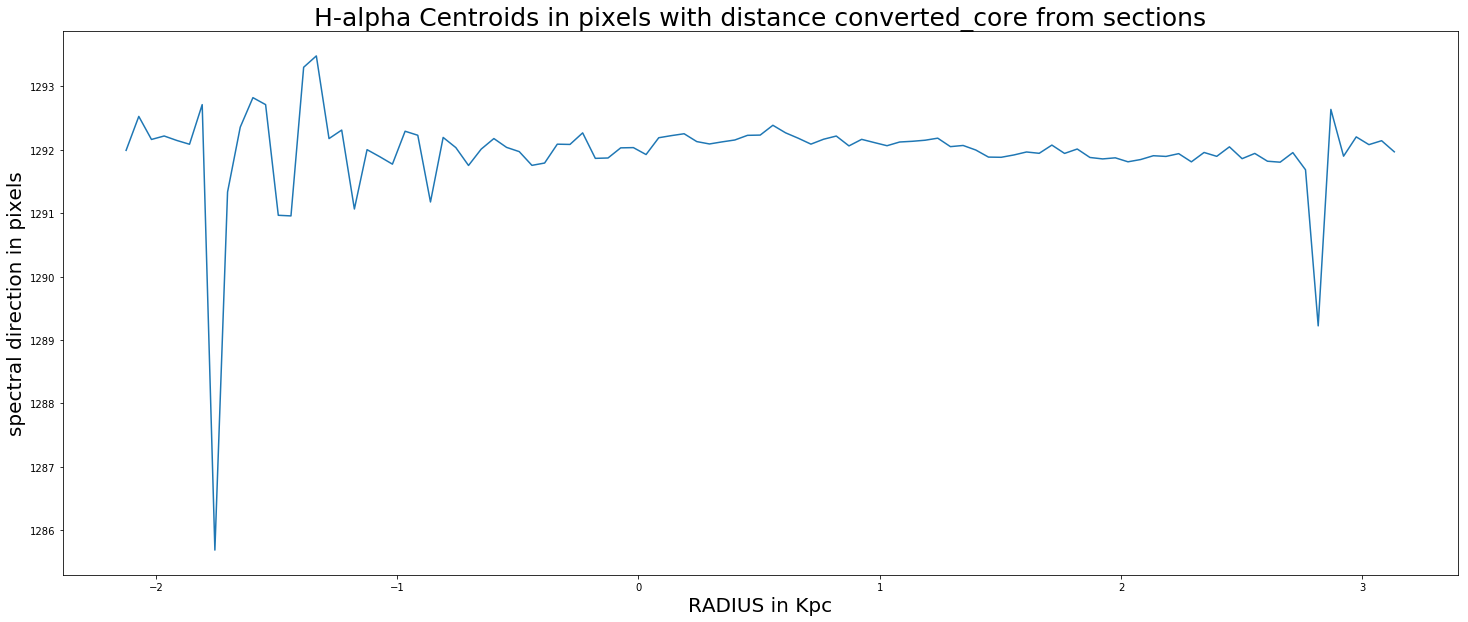

In [16]:
plt.figure(figsize=(25,10))
plt.plot(distances_sections * u.kpc,wl_pix_corrected)
plt.title('H-alpha Centroids in pixels with distance converted_core from sections',fontsize=25)
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('spectral direction in pixels',fontsize=20)



## convert pixs to velocity

In [17]:
centroids_wl = ds_red10.pixtowl(centroid_specpix_fullccd)*u.angstrom
Hacorewl_specpix_fullccd = np.mean(means) + wl_pix_correction + 1288 #THIS 55 ISNT CORRECT-THATS SPATIAL NEED SPECTRAL
print(Hacorewl_specpix_fullccd)

Ha_core_wl = ds_red10.pixtowl(Hacorewl_specpix_fullccd)*u.angstrom




#velocities NOT relative to the core
v_spec_centroids = (centroids_wl /(6563*u.angstrom) -1) * const.c #centroid velocities
print('core', Ha_core_wl)
v_core = ((Ha_core_wl/(6563*u.angstrom)) -1) * const.c #core velocity
#print('vccore',v_core,'vspec gauss',np.shape(v_spec_gaussians),'core_wl_sections',core_wl_sections)

#velocities relative to the core from sections
#y_axis_Gvelocity = (v_spec_gaussians - v_core).to('km/s')  #gaussian
y_axis_Cvelocity = (v_spec_centroids - v_core).to('km/s') #centroids

print('vel of Ha wl "core":',v_core.to('km/s'))
print('rotating pretty fast for a small galaxy.....is this possible? prob not')

1374.13436197
core 6748.039255016916 Angstrom
vel of Ha wl "core": 8452.441427397538 km / s
rotating pretty fast for a small galaxy.....is this possible? prob not


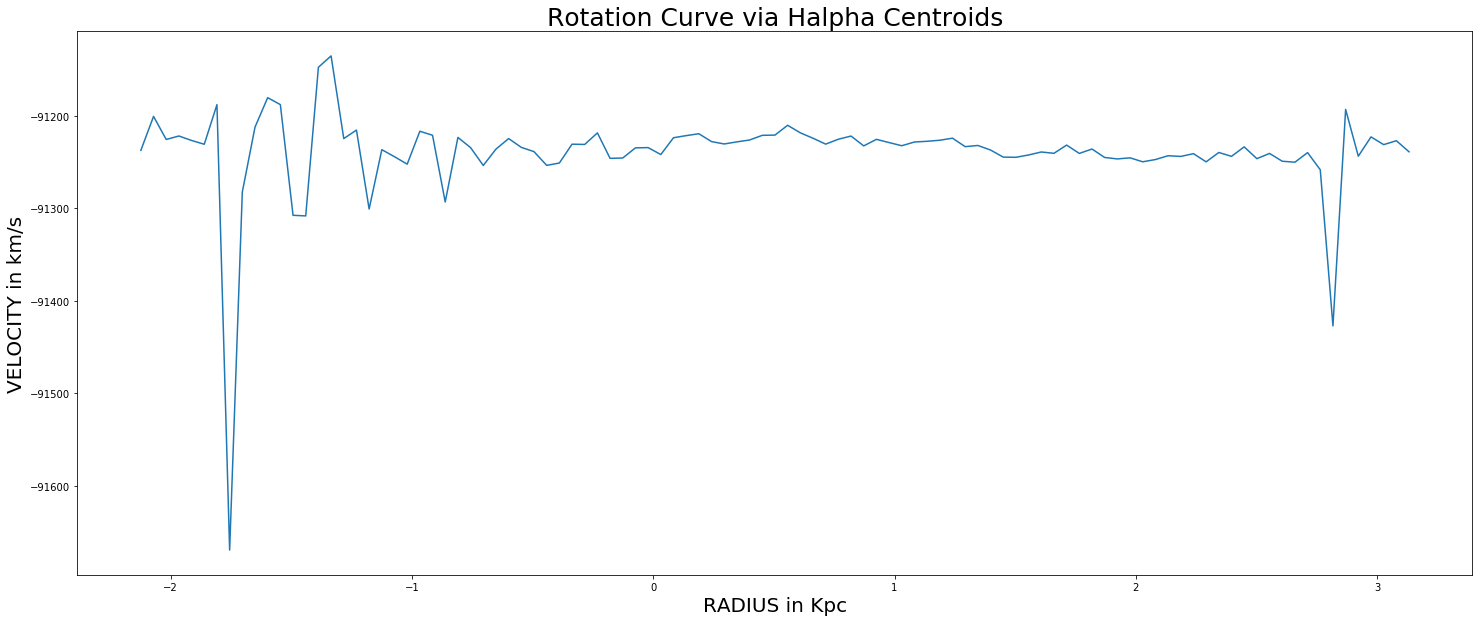

In [18]:
plt.figure(figsize=(25,10))
plt.title('Rotation Curve via Halpha Centroids', SIZE=25)
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('VELOCITY in km/s',fontsize=20)
plt.plot(distances_sections * u.kpc, y_axis_Cvelocity)
#plt.ylim(-81275,-81125)

## Beowulf 3

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


3 target files located
choose 2D spec for redside
choose 1D target spec axis limits for redside


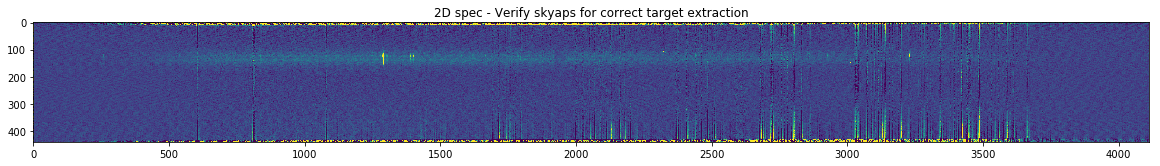

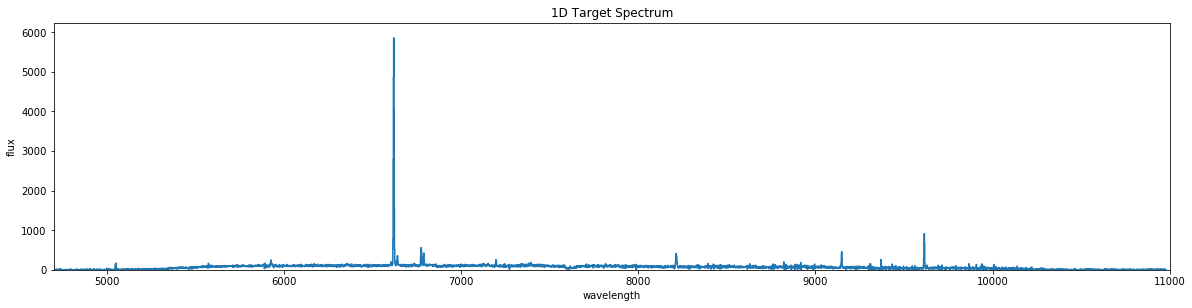

In [19]:
#RED SIDE 1.0 only
#naming files needed
targetID_red10_b3 = 'Beowulf_3'
skyaps_red10_b3 = [(60,110),(180,350)] #210-350
all_side_files_target = 'DoubleSpec/20151109/red*.fits'
flatid = 'DomeFlats 1p0'
specaps=(105,130)#((120,135))#90-105
vmax = 40
vmin = -10
model_b3 = ('linear')#('poly',2)#'linear'

flux_red10_B3,unc,comb = pipeline.sky_subtract(targetID_red10_b3,skyaps_red10_b3,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model_b3)

# Starting 2nd reduction technique for rot.curves
## isolating h-alpha region (removed 2D from pipeline to play with)

In [20]:
#need this for 2d only extraction (pipeline modification)
def sky_subtract(comb,skyaps,model):    
    #plotting 2D to get skyaps right around the target
    plt.figure(figsize=(10,25)) #setting up fig size
    value = model[1]
    if model == 'linear':
        subimg, models = comb.subtract_sky(skyaps, skymodel=modeling.models.Linear1D(1,0)) #(1,0)
    elif model == ('poly',value):
        subimg, models = comb.subtract_sky(skyaps, skymodel=modeling.models.Polynomial1D(value)) #Linear1D(1/10,10)) #(1,0)
    elif model == ('combined',value):
        mymodel=(modeling.models.Polynomial1D(value) + modeling.models.Linear1D(1,0))
        subimg, models = comb.subtract_sky(skyaps, skymodel=mymodel)
    elif model == None:
        subimg, models = comb.subtract_sky(skyaps, skymodel=None)#subtracts mean
    else:
        print ("Model type or polynomial degree not recognized")
    return (subimg, comb, models)    #subtracted2D, original, fitted models per row

(1286, 1295)

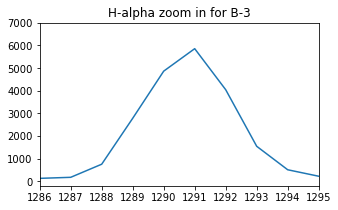

In [21]:
#quick spectral pix range estimate from 1D spectrum
plt.figure(figsize=(5,3))
plt.plot(flux_red10_B3)
plt.title('H-alpha zoom in for B-3')
plt.ylim(-200,7000)
plt.xlim(1286,1295) #1287-1294



In [22]:
#setup to extract 2D only (uses pipeline modification)


#stacking all those instrument-noise-subtracted target data files-help increase s/n 
atlasfiles = fits.open('henear.fits') #use for creating dispersion solution later 

#determing what instumentation noise is
flats = [reduce_dblspec.DoubleSpecImage(fn).overscan_sub_and_trim() for fn in 
          reduce_dblspec.find_all_obj(flatid,'DoubleSpec/20151109/red*.fits')[:10]] #DO I WANNA KEEP AS ONLY LAST 10???
nfl = reduce_dblspec.create_normalized_flat(flats)   
header = atlasfiles[0].header    
    
#locating all files w/ the target & instrumentation noise subtraction
specs = [reduce_dblspec.DoubleSpecImage(fn).overscan_sub_and_trim().flatten(nfl) 
          for fn in reduce_dblspec.find_all_obj(targetID_red10_b3,all_side_files_target)]
#specs is the inst. noise subtracted group of files with data from target    
    
print("This is lenspecs:",len(specs))
comb = reduce_dblspec.combine_imgs(specs) #comb-all files data from target stacked
#skyaps_red10 = [(50,100),(195,350)]
model=('poly',3)

subimg2, comb2, fitmodels = sky_subtract(comb,skyaps_red10_b3,model)
#subimg2 is sky-subtracted, instumentation noise subtracted, 

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


This is lenspecs: 3


SPECTRAL H-alpha wl range in pix: 1287:1296;
SPACE Target spatial range in pix space: 85:185


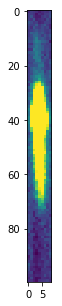

In [23]:
#2d ha region in pixels (from pipeline modification)

plt.figure(figsize=(5,5))
testingthis=subimg2.data[85:185,1287:1296] #[spatialrange,spectralrange]
#testingthis=subimg2.data[105:195,1238:1346] #a 50 wl wide section around Ha
ha_spacepix_range = [85,185]
ha_specpix_range = [1287,1296] 

vmin=-10
vmax=45
plt.imshow(testingthis,vmin=vmin,vmax=vmax)
print('SPECTRAL H-alpha wl range in pix: 1287:1296;') #w/o missing 3 wl's , to use with flux data - 3
print('SPACE Target spatial range in pix space: 85:185')

## getting galaxy core using full continuumm


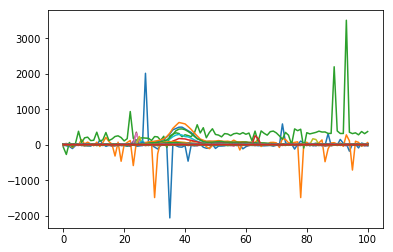

In [24]:
#getting gal core pix...PART ONE

target_aperature=(85,185) #target location

flux_data=[] #empty list to hold target 2d spec
apslc = np.arange(target_aperature[0],target_aperature[1]+1,1) #makes list for which rows to extracct spec from
#print (apslc) #as expected, +1 so doesnt cut off last value

#plt.plot(flux_red10_AK2[0:10])
#based on plot need to chop first 3 pixs due to osscialations 

#np.shape(subimg2.data)#(440, 4114)
for i in apslc:
    spec = subimg2.data[i]#subimg2 is sky-subtracted 2D spec #this is every row's spec...
    #plt.figure(figsize=(20,10))
    #plt.plot(spec)
    #need to change if suming multiple pixel rows
    #spec = spec[3::] #chops first 3 flux values in spectral (wl) direction-crazy osscillations
    flux_data.append(spec) #collects a list of every row's spec within the target location
flux_data=np.array(flux_data)
plt.plot(flux_data);
wl_pix_correction = 0



shape (101, 1)
x: 0.0 y: 47.9285130794 y is the spatial core location still in pixels & in the Reduced spectral range
to get full plate scale pix value add 85 and 3 from 1D spec cut due to oscillations
GALAXY CORE (based on entire red side plate scale) IS AT SPATIAL PIXEL: 132.928513079
SPACE_PIX_CORRECTION DEFINED HERE!!!!!!!


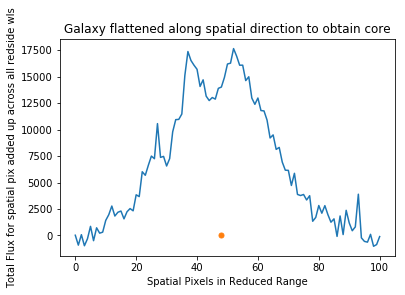

In [25]:
#getting gal spatial core pix...PART TWO

#flattening to be along spatial direction (histogram like)
flux_array = np.sum(flux_data,axis=1) #explicitly making an array
flux_array2d = flux_array[:, np.newaxis] #need 2d for centroiding


print('shape',np.shape(flux_array2d))
x_galcore, y_galcore = centroid_com(flux_array2d) #actually doing the centroiding

#plotting
plt.plot(flux_array2d);
plt.plot(y_galcore, x_galcore ,'.',markersize=10)
plt.xlabel('Spatial Pixels in Reduced Range')
plt.ylabel('Total Flux for spatial pix added up across all redside wls')
plt.title('Galaxy flattened along spatial direction to obtain core')
space_pix_correction = target_aperature[0] 
spatial_core_pix = y_galcore + space_pix_correction #(adds 55 to correct from target extraction),(DONT need 3 from oscillations doesnt affect this b/c of spectral collapse in sum)

#conclusions
print('x:',x_galcore,'y:',y_galcore, 'y is the spatial core location still in pixels & in the Reduced spectral range')
print('to get full plate scale pix value add {:} and 3 from 1D spec cut due to oscillations'.format(target_aperature[0]))
print('GALAXY CORE (based on entire red side plate scale) IS AT SPATIAL PIXEL:',spatial_core_pix)
print('SPACE_PIX_CORRECTION DEFINED HERE!!!!!!!')




## getting galaxy core using regions around Ha



shape of first section: (101, 50) matches shape of second section: (101, 50)
shape of first section 2d: (101, 1)
shape of second section 2d: (101, 1)
first section centroid x,y: 0.0 48.3042557352
second section centroid x,y: 0.0 47.4247543711
This is the average pixel value of the core BEFORE spatial cutout corrections 47.8645050531
Pixel Value of core along spatial axis wrt full CCD size 132.864505053


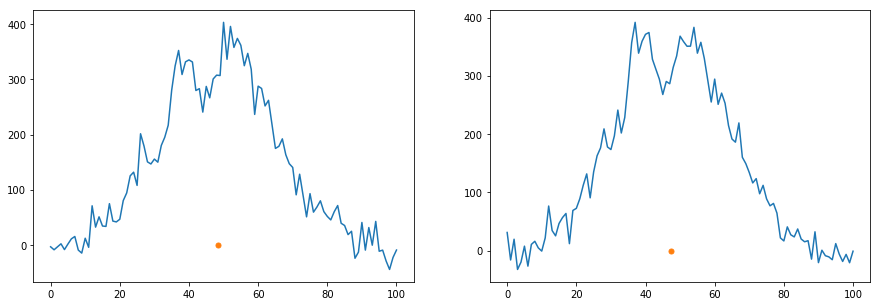

In [26]:
#USING SECTIONS SURROUNDING HALPHA WL RANGE
np.shape(flux_data)#(226,4104) #note that this is missing those 3 wl's
#also note flux_data is continuum subtracted



#making arrays surrounding h-alpha
upperha = 1296 #subtracted 3 already for osscillation in spectral direction (did another -1)
lowerha = 1287 #subtracted 3 already for osscillation in spectral direction (did another -1)
width_sections = 50
upper_one = lowerha - 1 #just to give it some distance
lower_one = upper_one - width_sections
lower_two = upperha + 1
upper_two = lower_two + width_sections
first_section = flux_data[:,lower_one:upper_one]
second_section = flux_data[:,lower_two:upper_two]
print('shape of first section:', np.shape(first_section), 'matches shape of second section:', np.shape(second_section))
#plt.plot(second_section[120]); #tried many diff row values for both sections here - satisified correct


#collapsing both sections in the spatial direction (histogram like)
first_section_sum = np.sum(first_section,axis=1) 
first_section2d = first_section_sum[:,np.newaxis] #2d required to centroid
second_section_sum = np.sum(second_section,axis=1)
second_section2d = second_section_sum[:,np.newaxis] #2d required to centroid
print('shape of first section 2d:', np.shape(first_section2d))
print('shape of second section 2d:', np.shape(second_section2d))


#does the centroiding
x_first, y_first = centroid_com(first_section2d)
x_second, y_second = centroid_com(second_section2d)
print('first section centroid x,y:',x_first,y_first)
print('second section centroid x,y:',x_second,y_second)



#verify by plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(first_section2d);
ax2.plot(second_section2d);
#note below had to reverse xy centroids to visualize correctly, not sure why it inverted tho...
ax1.plot(y_first,x_first, '.', markersize=10)
ax2.plot(y_second,x_second, '.', markersize=10)

#averaging the two core values, the y's
core_array = np.array([y_first,y_second])
core_avgcentroids = np.mean(core_array)
print('This is the average pixel value of the core BEFORE spatial cutout corrections',core_avgcentroids)

#corrections to pixel value of avg section core
core_from_sections = core_avgcentroids + space_pix_correction #corrects for spatial axis target cutout
print('Pixel Value of core along spatial axis wrt full CCD size',core_from_sections)





## Centroiding Halpha within target



should be blank []
[  3.42638149   3.13370487   2.49970835   4.41477236 -19.24800538
   2.28376463   1.12333144   4.4591551    2.61055908   3.84686764
   3.42457385   3.01025145   3.73033297   3.18712929   3.84231353
   2.48550471   3.00923434   3.04004469   3.77072899   4.2804322
   3.74028267   3.37789419   4.12631723   4.15925903   4.04425499
   4.11881706   3.59180232   3.66555162   3.79500389   3.76016027
   3.608128     3.69814012   3.72339763   3.66448431   3.68460112
   3.66371079   3.71561904   3.80057247   3.84431939   3.87079471
   3.90920319   3.89453127   3.87279093   3.93031407   3.93268175
   4.00571678   3.94115952   3.76480219   3.85670792   3.87405474
   3.86942274   4.03281589   4.10150606   4.13710567   4.19906391
   4.16309736   4.17469884   4.14287172   4.23779835   4.32947817
   4.24602633   4.32356638   4.39407846   4.41370171   4.38379812
   4.47029382   4.62584383   4.37831149   4.31567117   4.50532148
   4.84473828   4.35165614   4.71138987   4.61314537   5.5

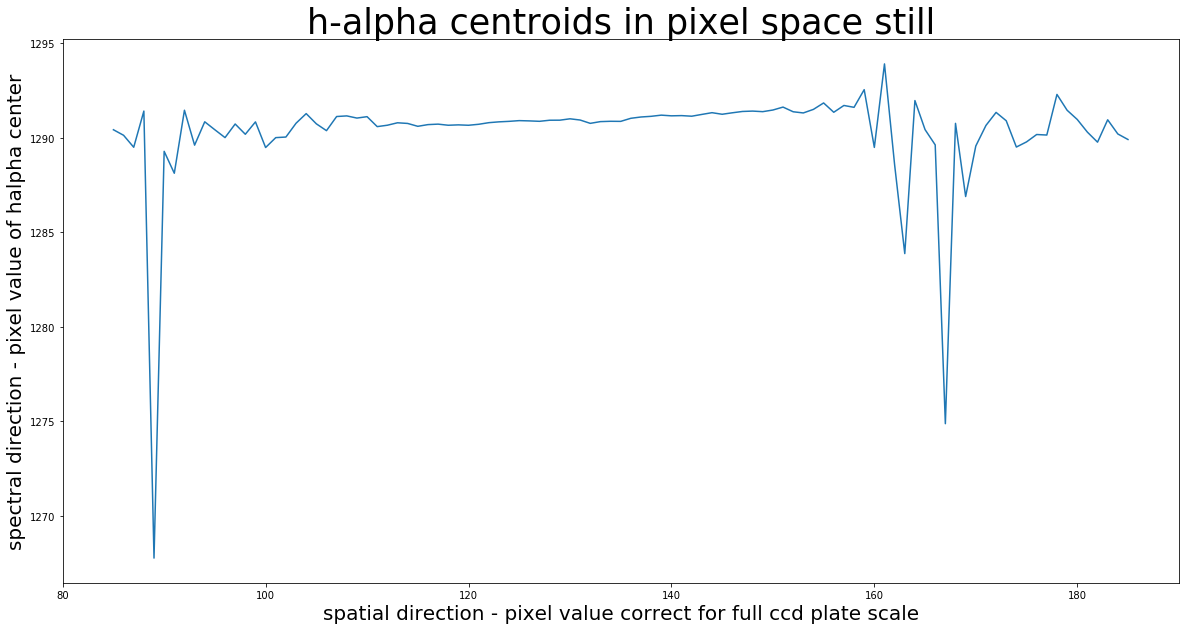

In [27]:

#below for reference, uses full ccd wl range - first defined when applied DS
wl = np.array(ds_red10.pixtowl(np.arange(len(subimg2.data[::][0]))))
wl_shorter2 = wl[1287:1296] #isolate wl around h-alpha using full ccd plate wl range formerly 1387:1400
new_short = flux_data[:,1287:1296]


means_unc=[]
means=[]
print('should be blank',means)
stddev = []
gfit_vals = []
mylist2 = []
mylist_ys2 = []
holding2 = []
ha_wls2 = []
##below for reference- new is continuum subst target flux data (flux_data has 10 wl cut)
#concerned 10 wl cut means 10 flux cut too in the lenght of the data but cant decide
#if the 10 is already accounted for by +1387 or should also add into space_pix_correction2
#b/c that 10 cut cutout those wl's and corresponding fluxes
##new_short = new[:,1386:1399] #cut to isolate wl around h-alpha with 10 pix misisng b/c its continuum subt data not 2d full ccd

#gets halpha centroids in target gal's range
for row in new_short: 
    #calculates centroids per row
    flux_fake2d2 = row[np.newaxis, :] #makes each row array into a fake2d
    #print('row?',flux_fake2d)
    mylist4, mylist5 = centroid_com(flux_fake2d2)#finds center(x,y) of halpha for each row array
    #print(mylist4) #, mylist5)
    #holding_arr2 = row, wl_shorter2
    #xarr = np.array([row,wl_shorter2])
    mylist_ys2.append(mylist5)
    mylist2.append(mylist4) #collects all halpha centers/centroids per row
    
    #calculating errors per row via gaussian fit
    x = ar(range(len(row)))
    y = row
    mean = mylist4
    g_init = models.Gaussian1D(amplitude=max(y), mean=mean, stddev=2.)
    fit_g = fitting.LevMarLSQFitter()
    gaussian = fit_g(g_init, x, y)
    #print('mean', gaussian.mean)
    means.append(gaussian.mean.value)
    gfit_vals.append(gaussian)
    stddev.append(gaussian.stddev.value) #
    
    #trying to get uncertainities per row via covariance matrix
    gaussian.param_cov = fit_g.fit_info['param_cov']
    #means_unc.append(fit_g.fit_info['param_cov'][1][1]) #dont know why this doesnt work
    
 #end of for loop   
gfit_vals = np.array(gfit_vals)  
stddev = np.array(stddev)
means = np.array(means)
mylist2=np.array(mylist2) #halpha centroids (wl) array
print(mylist2)
print('mean',np.shape(means))#,means, 'fixed THE PROBLEM!!!!!!!!!!!!!!!!!!!!!!')
gaussmax_specpix_fullccd = means + stddev + wl_pix_correction + 85
centroid_specpix_fullccd = mylist2 + wl_pix_correction + 85




#taking sqrt of unc to get a true sigma
sigma_gauss = []
for i in means_unc:
    sigma = m.sqrt(abs(i))
    sigma_gauss.append(sigma)
sigma_gauss


#correction for target wl pix's to match index of full ccd plate pix's (still not correct len but dont care about below target pixs-no data there neway)
#1386 correction b/c thats the cut used for new_short when isolating ha due to 10 pix initial cut
wl_pix_corrected = mylist2 + wl_pix_correction + 1287 #decide how to better automate/track this
print('wl_pix_corrected defined here')
#dont have to account for osciallations b/c used full ccd plate range b4 wl cut 4 h-alpha isolation
space_pix_correction2 = np.arange(len(mylist2)) + space_pix_correction #centroids

print('len',len(mylist2),type(mylist2), np.shape(mylist2))
print('len',len(space_pix_correction2),type(space_pix_correction2), np.shape(space_pix_correction2))
print(np.shape(stddev))
 
    
#plotting
plt.figure(figsize=(20,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - pixel value of halpha center',fontsize=20)
plt.plot(space_pix_correction2,wl_pix_corrected)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
plt.title('h-alpha centroids in pixel space still',fontsize=35)
#plt.ylim(1393,1405)

<class 'numpy.ndarray'>
LOOKS PROMISING


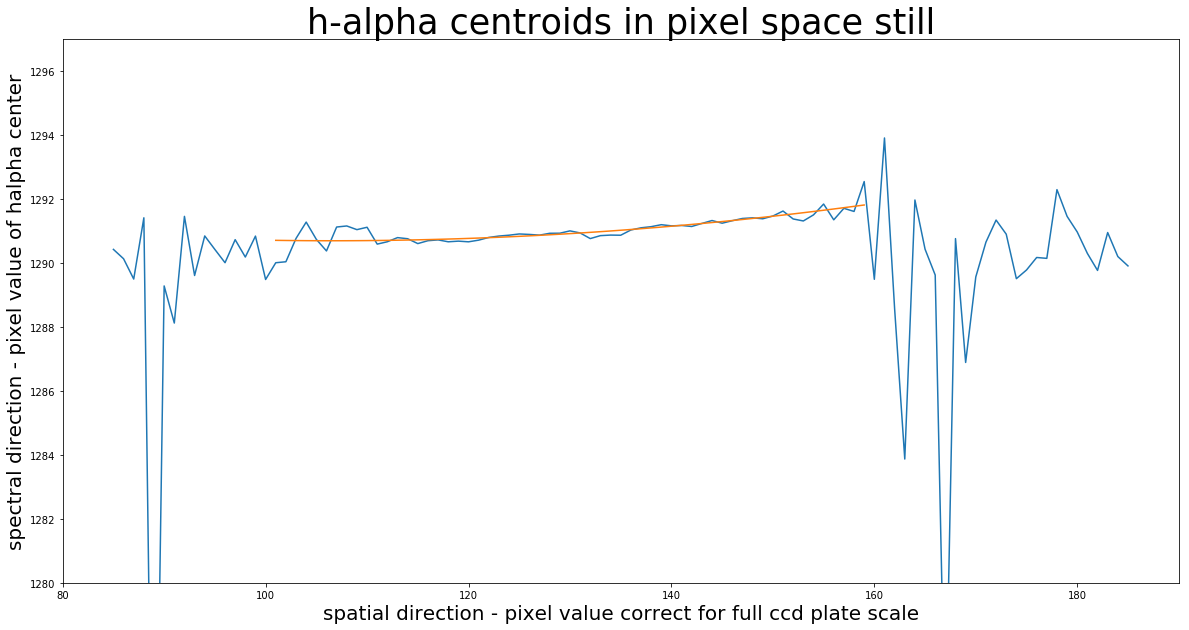

In [28]:
#plotting
plt.figure(figsize=(20,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - pixel value of halpha center',fontsize=20)
plt.plot(space_pix_correction2,wl_pix_corrected)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
plt.title('h-alpha centroids in pixel space still',fontsize=35)
plt.ylim(1280,1297)

print(type(space_pix_correction2))

#fit a line (avoiding osccillations at ends)
model = modeling.models.Polynomial1D(2)
x=np.arange(100,160,1)
fitmsk = (100<space_pix_correction2)&(space_pix_correction2 <160)
y=wl_pix_corrected
fit = modeling.fitting.LevMarLSQFitter()#space_pix_correction2)#,[linemodel,[y],[x]])
linemodel = fit(model,space_pix_correction2[fitmsk],wl_pix_corrected[fitmsk])
modwl = np.linspace(space_pix_correction2[fitmsk][0], space_pix_correction2[fitmsk][-1], 100)
plt.plot(modwl, linemodel(modwl))


print('LOOKS PROMISING')

## convert pixs to kpc



In [29]:
target_spacepix_fullccd = np.arange(len(mylist2)) + space_pix_correction
distance_pix_wrtcore_sections = target_spacepix_fullccd - core_from_sections #for core wl using 2 sections around Halpha

#actual converting for loop CENTROIDS pixels to kpc
#good for core defined by 2 sections around halpha

#converts pixels to kpc (distance profile)
arcmins_sections =[]
distances_sections=[]
more_sections = []


#converts pix to kpc and saves as quantity list
for i in distance_pix_wrtcore_sections:
    r_in_arcmin = 1*u.arcmin
    redplatescale = 0.293*u.arcsec/u.pixel
    dbsp_pix_equiv = u.pixel_scale(redplatescale)
    r_in_pixel = i*u.pixel
    r_in_arcmin = r_in_pixel.to('arcmin', dbsp_pix_equiv)
    #print(r_in_arcmin)
    distance = 37*u.Mpc # distance of object (host) from us
    rad_to_arcmin = (1*u.rad).to('arcmin')
    r_in_kpc = ((r_in_arcmin/rad_to_arcmin)*distance).to("kpc") #gets radians*distancefromus for gal width in kpc
    #print(r_in_kpc)
    more_sections = r_in_kpc #/ (1*u.kpc)
    #print(more_sections)
    distances_sections.append(more_sections.value)
distances_sections = np.array(distances_sections)

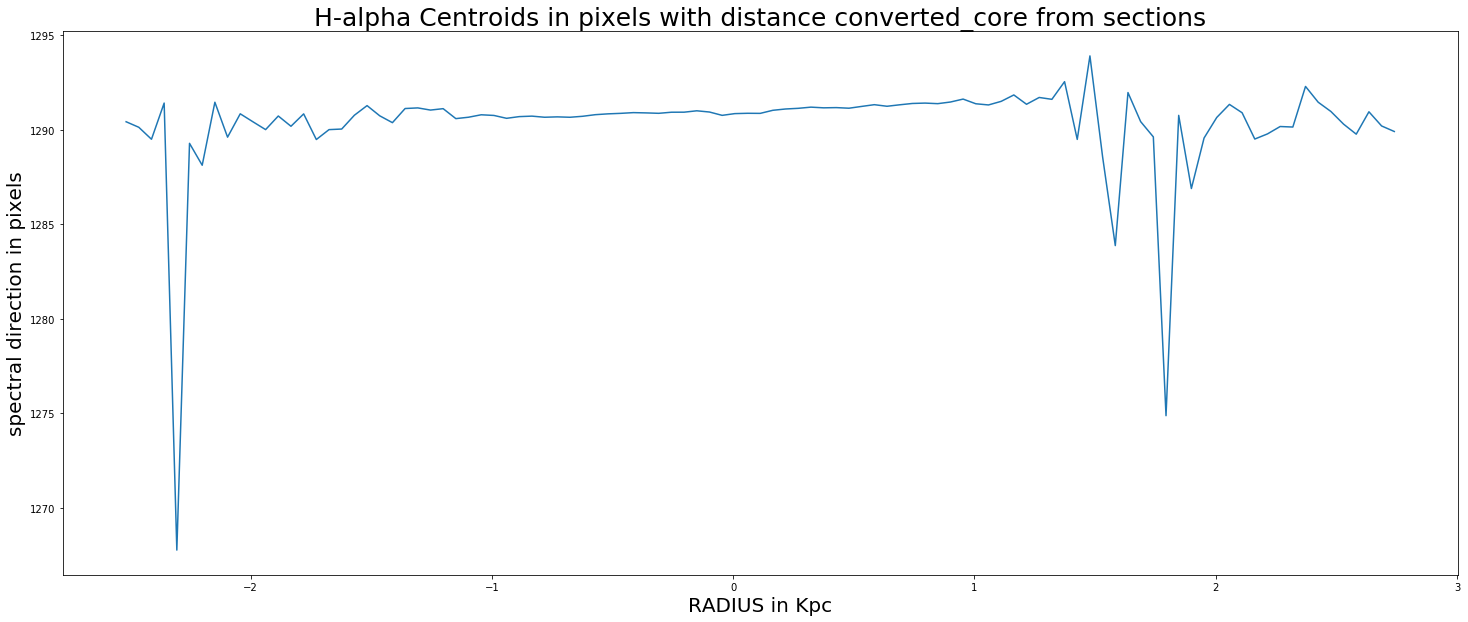

In [30]:
plt.figure(figsize=(25,10))
plt.plot(distances_sections * u.kpc,wl_pix_corrected)
plt.title('H-alpha Centroids in pixels with distance converted_core from sections',fontsize=25)
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('spectral direction in pixels',fontsize=20)



## convert pixs to velocity

In [31]:
centroids_wl = ds_red10.pixtowl(centroid_specpix_fullccd)*u.angstrom
Hacorewl_specpix_fullccd = np.mean(means) + wl_pix_correction + 1287 #THIS 55 ISNT CORRECT-THATS SPATIAL NEED SPECTRAL
print(Hacorewl_specpix_fullccd)

Ha_core_wl = ds_red10.pixtowl(Hacorewl_specpix_fullccd)*u.angstrom




#velocities NOT relative to the core
v_spec_centroids = (centroids_wl /(6563*u.angstrom) -1) * const.c #centroid velocities
print('core', Ha_core_wl)
v_core = ((Ha_core_wl/(6563*u.angstrom)) -1) * const.c #core velocity
#print('vccore',v_core,'vspec gauss',np.shape(v_spec_gaussians),'core_wl_sections',core_wl_sections)

#velocities relative to the core from sections
#y_axis_Gvelocity = (v_spec_gaussians - v_core).to('km/s')  #gaussian
y_axis_Cvelocity = (v_spec_centroids - v_core).to('km/s') #centroids

print('vel of Ha wl "core":',v_core.to('km/s'))


1283.85070241
core 6609.631590847665 Angstrom
vel of Ha wl "core": 2130.0928296010957 km / s


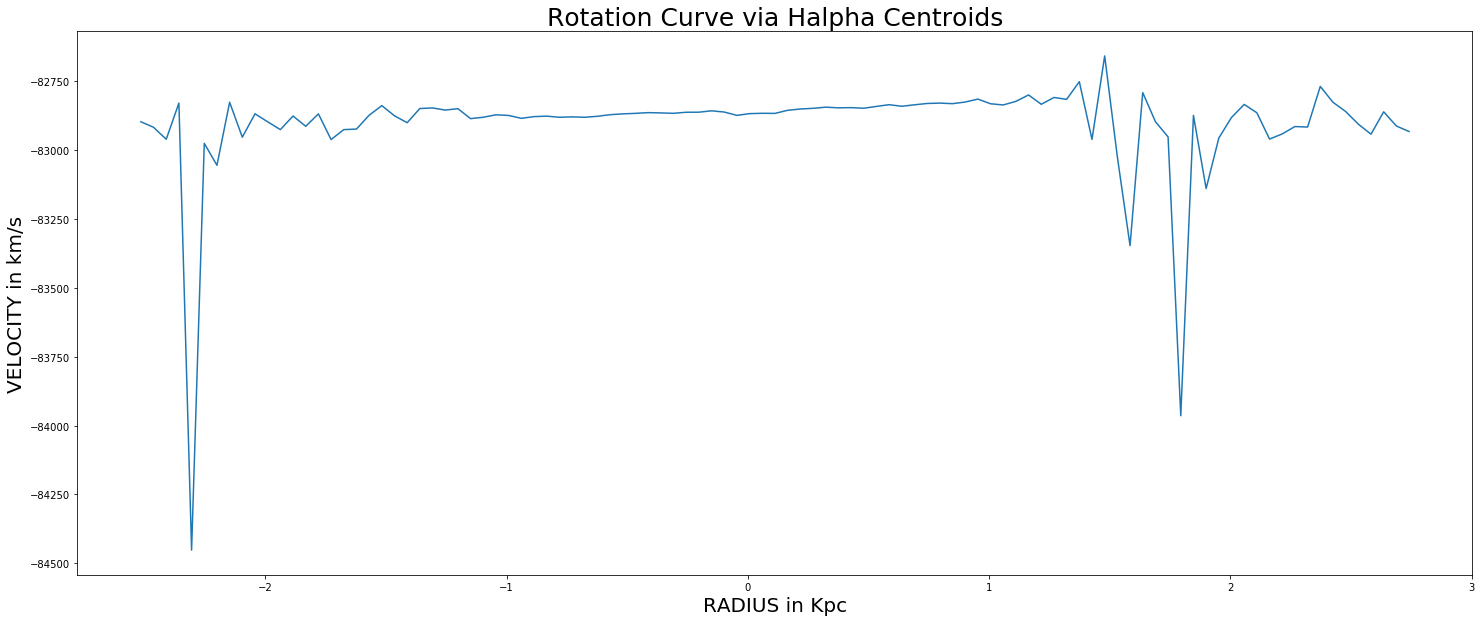

In [32]:
plt.figure(figsize=(25,10))
plt.title('Rotation Curve via Halpha Centroids', SIZE=25)
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('VELOCITY in km/s',fontsize=20)
plt.plot(distances_sections * u.kpc, y_axis_Cvelocity)
#plt.ylim(-81275,-81125)